In [59]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
from src.graph import GraphModel 
import src.estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from IPython.display import display
from pyvis.network import Network

import pickle

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# https://networks.skewed.de/net/celegans_2019

Networks among neurons of both the adult male and adult hermaphrodite worms C. elegans, constructed from electron
microscopy series, to include directed edges (chemical) and undirected (gap junction), and spanning including nodes for muscle and non-muscle end organs.1

For chemical connections, directed edges go from pre-synaptic cell to post-synaptic cell.

The 'connectivity' edge property corresponds to the total number of EM serial sections
of connectivity, taking into account both the number of synapses and the sizes of synapses.

To provide complete coverage of the entire nervous system, the data are assembled from multiple
animals and include connections added by extrapolation in gaps where no data were available.

For 'synapse' data the edge property 'synapses' contain the number of synapses scored between each pair of cells. These networks differ from the others in
not taking into account the sizes of synapses and in showing only connections scored on electron micrographs. It does not include any connections inserted
by extrapolation. Thus there are cells showing no connection here that are connected in the the other matrices. Also note, there are more edges in these networks than
the total number of synapses scored (synapse lists, Supplementary Information 3). This is because polyads are listed here more than once (once for each postsynaptic cell).

The '_corrected' networks correspond to corrected versions of the network made available in July 2020.

In [68]:
import graph_tool.all as gt
model = "celegans_2019/male_gap_junction" # directed graph
#g = gt.collection.ns["celegans_2019/male_chemical"] # directed graph
graph = gt.collection.ns[model]
type(graph)

graph_tool.Graph

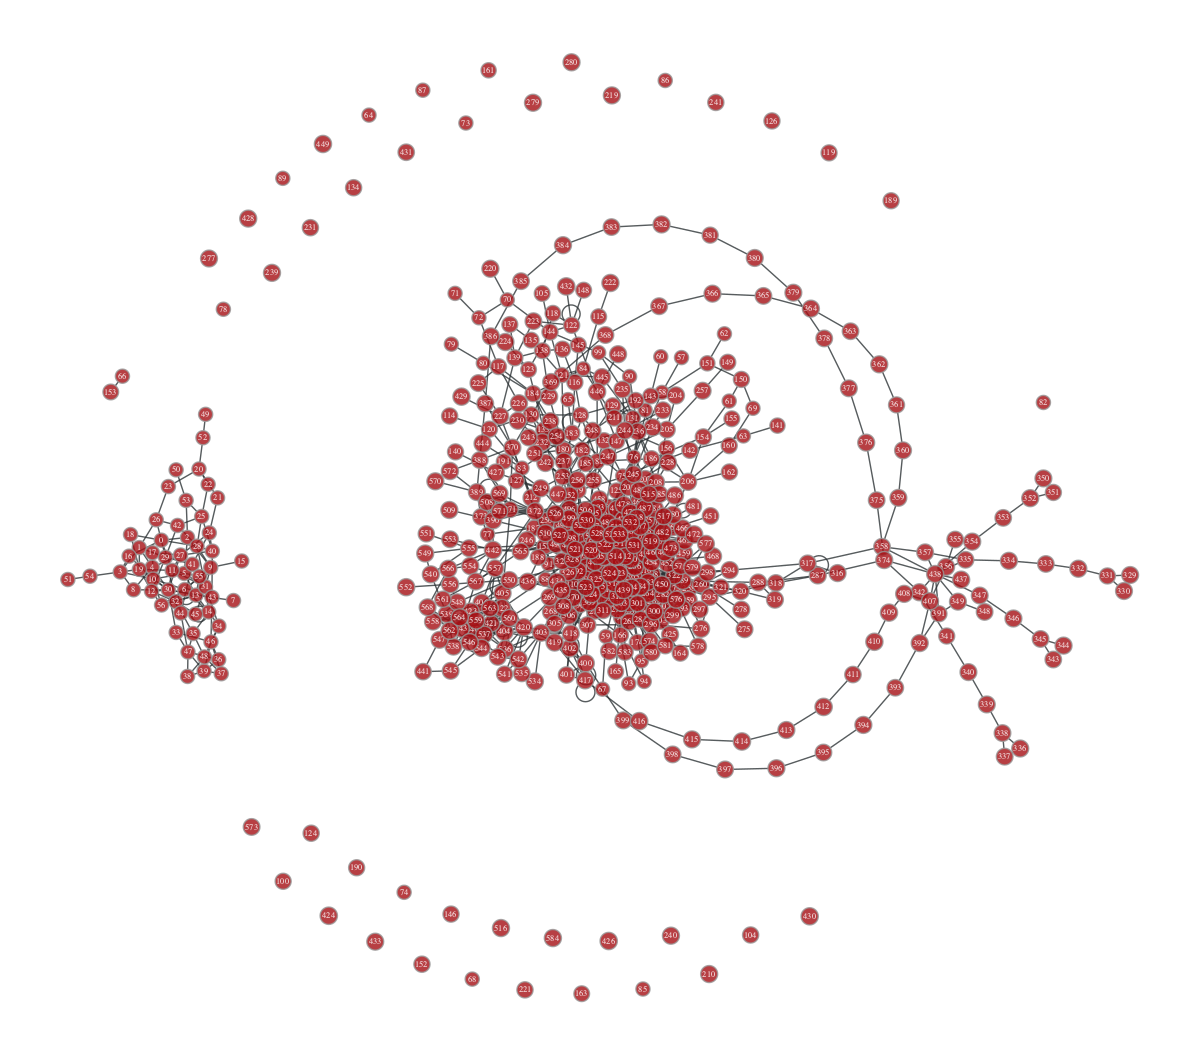

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2908f8980, at 0x2a9031010>

In [52]:
from graph_tool.all import *
graph_draw(graph, vertex_text=graph.vertex_index, bg_color='white')

In [53]:
from graph_tool.all import *
g = adjacency(graph)
print(g.toarray()), type(g.toarray())

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(None, numpy.ndarray)

# Visualization

In [54]:
ut = utils.GraphUtils()

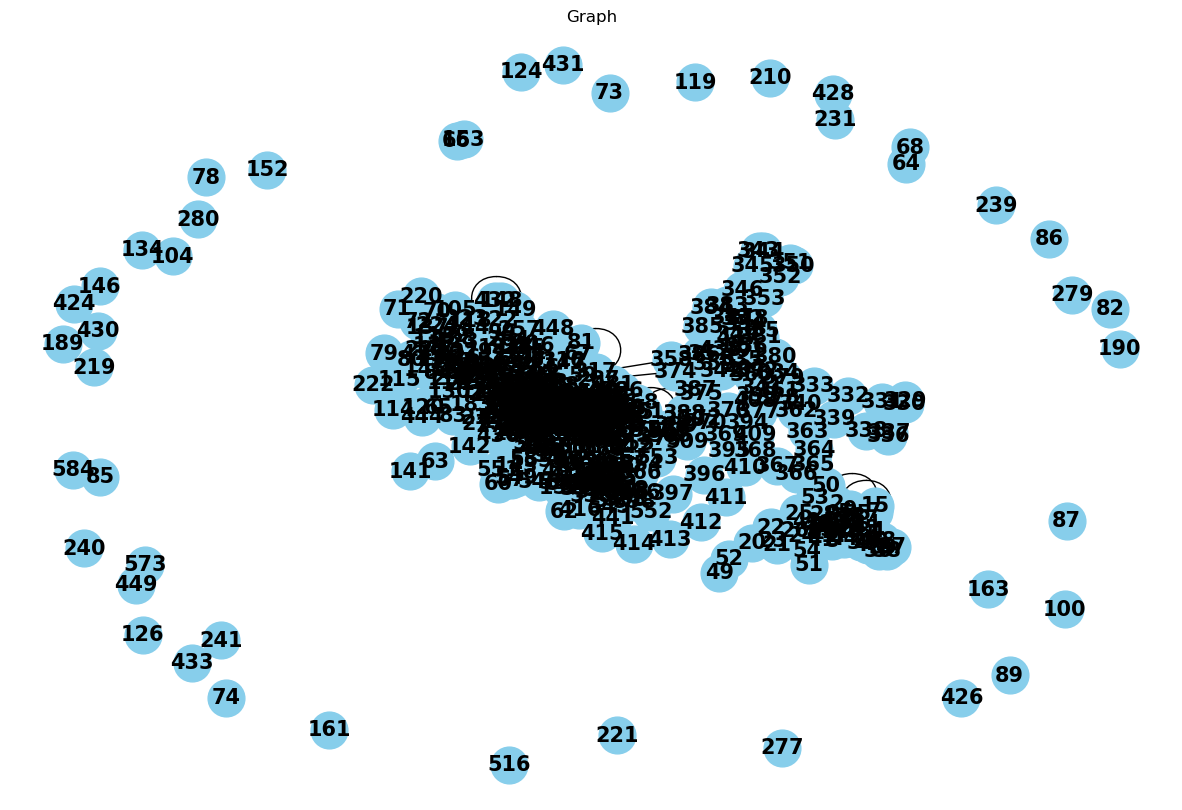

In [55]:
ut.plot_graph_from_adjacency(g, pos=None, title='Graph', size=(15,10))

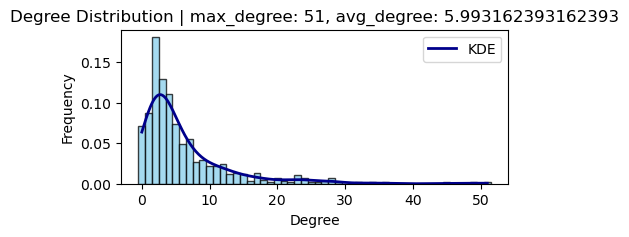

In [56]:
ut.plot_degree_distribution(g, title='Degree Distribution', size=(5,2))

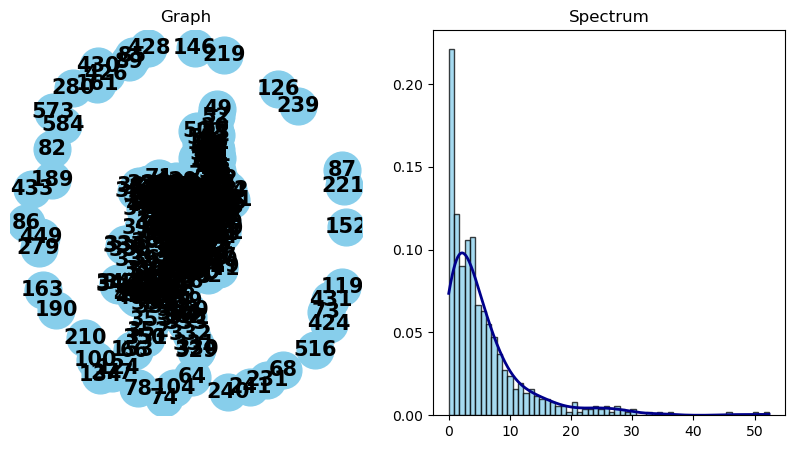

In [67]:
graph_model = GraphModel
s = graph_model.calculate_spectrum(g)
ut.plot_graph_and_spectrum(g, s, pos=None, title=None, size=(10, 5))

# Saving the graph

In [70]:
ut = utils.GraphUtils()
params_dict = {'model_name':model.replace('/', '_')}
ut.saving_graph_artifacts(params_dict=params_dict, graphs=g, spec=s)

../data/input/graph_data_model_name=celegans_2019_male_gap_junction.pickle
../data/input/spec_data_model_name=celegans_2019_male_gap_junction.pickle


In [71]:
g, s = ut.loading_graph_artifacts(params_dict)

In [72]:
ut.save_graph_html(g, params_dict=params_dict)

../data/output/graph_model_name=celegans_2019_male_gap_junction.html
